<a href="https://colab.research.google.com/github/sravani1102/Final-Year-Project/blob/main/DRDiagonsis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import os
import numpy as np
import cv2 as cv
import random
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, InputLayer, concatenate, Conv2D, MaxPooling2D, Flatten, Dense, UpSampling2D, Reshape, Dropout, Activation, Permute
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import plot_model as plot
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# paths
train_img_dir = '/content/drive/MyDrive/IDRID_Diagonsis/train'
test_img_dir = '/content/drive/MyDrive/IDRID_Diagonsis/test'
traindf_path = '/content/drive/MyDrive/IDRID_Diagonsis/training_labels.xlsx'
testdf_path = '/content/drive/MyDrive/IDRID_Diagonsis/testing_labels.xlsx'

In [ ]:
# CSV to Pandas Dataframe
traindf = pd.read_excel(traindf_path)
traindf['Image name'] = traindf['Image name'].astype(str) + '.jpg'
traindf['Retinopathy grade'] = traindf['Retinopathy grade'].astype(str)

testdf = pd.read_excel(testdf_path)
testdf['Image name'] = testdf['Image name'].astype(str) + '.jpg'
testdf['Retinopathy grade'] = testdf['Retinopathy grade'].astype(str)

In [ ]:
# Train ground truths
traindf.head()

,Image name,Retinopathy grade,Risk of macular edema
0,IDRiD_001.jpg,1,2
1,IDRiD_002.jpg,1,2
2,IDRiD_003.jpg,1,2
3,IDRiD_004.jpg,1,2
4,IDRiD_005.jpg,1,0


In [ ]:
# Test ground truths
testdf.head()

,Image name,Retinopathy grade,Risk of macular edema
0,IDRiD_001test.jpg,1,0
1,IDRiD_004test.jpg,1,0
2,IDRiD_005test.jpg,1,1
3,IDRiD_006test.jpg,1,1
4,IDRiD_007test.jpg,1,0


In [ ]:
# Hyperparameter

train_batch_size = 8
valid_batch_size = 8
test_batch_size = 8
img_size = 224
epoch = 110

In [ ]:
# Train Image Data Generator

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                       horizontal_flip=True)

train_generator = train_datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = train_img_dir,
    x_col = 'Image name',
    y_col = 'Retinopathy grade',
    target_size = (img_size,img_size),
    class_mode = 'binary',
    batch_size = train_batch_size,
    shuffle = True
)

Found 375 validated image filenames belonging to 2 classes.


In [ ]:
# Test Image Data Generator

test_datagen = ImageDataGenerator(rescale = 1./255.)

test_generator = test_datagen.flow_from_dataframe(
    dataframe = testdf,
    directory = test_img_dir,
    x_col = 'Image name',
    y_col = 'Retinopathy grade',
    target_size = (img_size,img_size),
    class_mode = 'binary',
    batch_size = test_batch_size,
    shuffle = True
)

Found 80 validated image filenames belonging to 2 classes.


**Deep Convolutional Neural Network Model**

In [ ]:
def DCNNmodel():
    model = tf.keras.models.Sequential([
        #Convolution layer 1
        Conv2D(64, (3,3), activation='relu', padding ='same', input_shape=(img_size,img_size, 3)),
        Conv2D(64, (3,3), activation='relu', padding ='same'),
        MaxPooling2D(2,2),

        #Convolution laye activation='relu', padding ='same'),
        MaxPooling2D(2,2),

        #Convolution layer 2
        Conv2D(128, (3,3), activation='relu', padding ='same'),
        Conv2D(128, (3,3), activation='relu', padding ='same'),
        MaxPooling2D(2,2),

        #Convolution layer 3
        Conv2D(256, (3,3), activation='relu', padding ='same'),
        Conv2D(256, (3,3), activation='relu', padding ='same'),
        Conv2D(256, (3,3), activation='relu', padding ='same'),
        Conv2D(256, (3,3), activation='relu', padding ='same'),
        Conv2D(256, (3,3), activation='relu', padding ='same'),
        MaxPooling2D(2,2),

        #Convolution layer 4
        Conv2D(512, (3,3), activation='relu', padding ='same'),
        Conv2D(512, (3,3), activation='relu', padding ='same'),
        Conv2D(512, (3,3), activation='relu', padding ='same'),
        Conv2D(512, (3,3), activation='relu', padding ='same'),
        Conv2D(512, (3,3), activation='relu', padding ='same'),
        MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.summary()
    model.compile(loss='binary_crossentropy', optimizer=Adam(0.0001), metrics=['accuracy'])
    return model

In [ ]:
model = DCNNmodel()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_15 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 112, 112, 64)      0         
 g2D)                                                            
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 56, 56, 128)       73856     
                                                                 
 conv2d_17 (Conv2D)          (None, 56, 56, 128)      

In [ ]:
# Training the model and saving metrics to history
history = model.fit(train_generator,
                    validation_data = test_generator,
                    steps_per_epoch = train_generator.samples//train_batch_size,
                    epochs =  epoch,
                    validation_steps = test_generator.samples//valid_batch_size,
                    verbose = 1,
                    )

Epoch 1/110
46/46 [==============================] - 35s 757ms/step - loss: 0.5145 - accuracy: 0.6975 - val_loss: 0.4942 - val_accuracy: 0.7000
Epoch 2/110
46/46 [==============================] - 35s 757ms/step - loss: 0.5158 - accuracy: 0.7030 - val_loss: 0.4927 - val_accuracy: 0.7250
Epoch 3/110
46/46 [==============================] - 37s 814ms/step - loss: 0.5137 - accuracy: 0.7084 - val_loss: 0.4929 - val_accuracy: 0.7125
Epoch 4/110
46/46 [==============================] - 31s 682ms/step - loss: 0.5178 - accuracy: 0.6703 - val_loss: 0.4594 - val_accuracy: 0.8000
Epoch 5/110
46/46 [==============================] - 36s 794ms/step - loss: 0.5685 - accuracy: 0.6866 - val_loss: 0.4537 - val_accuracy: 0.8125
Epoch 6/110
46/46 [==============================] - 34s 741ms/step - loss: 0.5188 - accuracy: 0.6921 - val_loss: 0.5116 - val_accuracy: 0.6875
Epoch 7/110
46/46 [==============================] - 40s 868ms/step - loss: 0.5077 - accuracy: 0.6948 - val_loss: 0.4981 - val_accuracy:

In [ ]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

max_acc = max(acc)
print("Train Accuray : ",round(max_acc*100,4))

Train Accuray :  98.3651


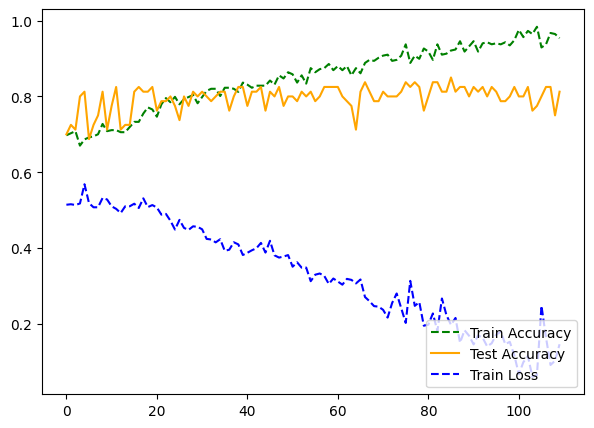

In [ ]:
epochs_range = range(epoch)

plt.figure(figsize=(7, 5))
plt.plot(epochs_range, acc, 'g--',label='Train Accuracy')
plt.plot(epochs_range, val_acc,color='orange', label='Test Accuracy')
plt.plot(epochs_range, loss,'b--', label='Train Loss')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " Presence of DR detected")
  else:
    print(fn + " No DR Detected")

Saving IDRiD_007test.jpg to IDRiD_007test.jpg
1/1 [==============================] - 1s 847ms/step
[1.]
IDRiD_007test.jpg Presence of DR detected


In [ ]:
uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " Presence of DR detected")
  else:
    print(fn + " No DR Detected")

Saving IDRiD_004test.jpg to IDRiD_004test.jpg
1/1 [==============================] - 0s 37ms/step
[0.]
IDRiD_004test.jpg No DR Detected
